<a href="https://colab.research.google.com/github/MehediTCF/AI-Lab/blob/main/AirQualityIndexNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving AirQualityUCI.xlsx to AirQualityUCI.xlsx


In [3]:
air_data = pd.read_excel('AirQualityUCI.xlsx')

In [4]:
air_data.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [5]:
air_data.shape

(9357, 15)

In [6]:
air_data.describe()


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [7]:
air_data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


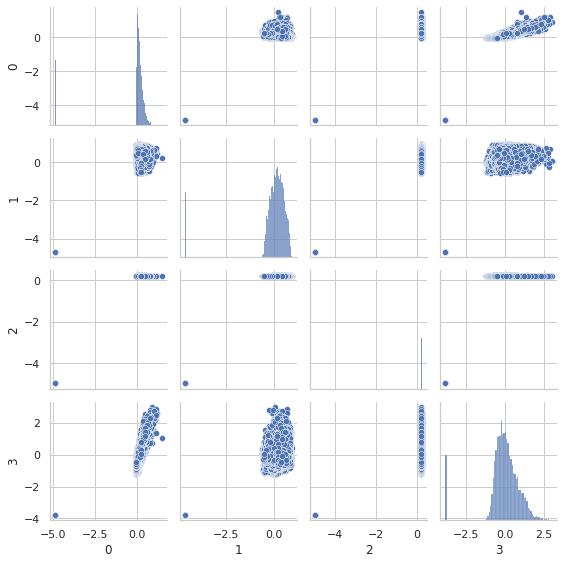

In [8]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
sns.set(style='whitegrid', context='notebook')
features_plot = ['C6H6(GT)', 'RH', 'AH', 'PT08.S1(CO)']

data_to_plot = air_data[features_plot]
data_to_plot = scalar.fit_transform(data_to_plot)
data_to_plot = pd.DataFrame(data_to_plot)

sns.pairplot(data_to_plot, size=2.0);
plt.tight_layout()
plt.show()

In [9]:
#preprocessing data
air_data.dropna(axis=0, how='all')


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [10]:
#features and labels
features = air_data


In [11]:
features = features.drop('Date', axis=1)
features = features.drop('Time', axis=1)
features = features.drop('C6H6(GT)', axis=1)
features = features.drop('PT08.S4(NO2)', axis=1)

In [12]:
labels = air_data['C6H6(GT)'].values


In [13]:
features = features.values


In [14]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)


In [15]:
from sklearn.ensemble import ExtraTreesRegressor


In [16]:
etr = ExtraTreesRegressor(n_estimators=300)
etr.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=300, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [17]:
print(etr.feature_importances_)
indecis = np.argsort(etr.feature_importances_)[::-1]

[7.98315893e-05 1.18663347e-01 6.32718136e-06 7.52398671e-02
 2.58751692e-04 4.72858838e-02 7.36808111e-05 4.69133732e-02
 2.26389453e-01 1.90826319e-01 2.94263166e-01]


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0)

In [19]:
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest,mutual_info_regression
from sklearn.model_selection import cross_val_score

X_Best = SelectKBest(mutual_info_regression, k=6).fit_transform(features, labels)
print(X_Best.shape)
X_train, X_test, y_train, y_test = train_test_split(X_Best, labels, test_size=0.3, random_state=0)

regressor = MLPRegressor()
regressor.fit(X_train,y_train)
print(regressor.score(X_test,y_test))
cross_val_score(regressor, X_train, y_train, cv=6)

(9357, 6)
0.9991780123837674


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([0.9987712 , 0.99879113, 0.99900541, 0.99903337, 0.998137  ,
       0.99859651])

In [20]:
import keras
from keras.models import Sequential
from keras.layers import *

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0)
model = Sequential()

# The Input Layer :
model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))
# Compile the network :
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1536      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2

In [22]:
model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)


Epoch 1/100
439/439 [==============================] - 3s 5ms/step - loss: 4.5568 - mean_absolute_error: 4.5568 - val_loss: 2.5293 - val_mean_absolute_error: 2.5293
Epoch 2/100
439/439 [==============================] - 2s 4ms/step - loss: 2.4156 - mean_absolute_error: 2.4156 - val_loss: 0.9982 - val_mean_absolute_error: 0.9982
Epoch 3/100
439/439 [==============================] - 2s 4ms/step - loss: 1.9638 - mean_absolute_error: 1.9638 - val_loss: 2.3542 - val_mean_absolute_error: 2.3542
Epoch 4/100
439/439 [==============================] - 2s 4ms/step - loss: 1.7481 - mean_absolute_error: 1.7481 - val_loss: 1.1984 - val_mean_absolute_error: 1.1984
Epoch 5/100
439/439 [==============================] - 2s 4ms/step - loss: 1.3324 - mean_absolute_error: 1.3324 - val_loss: 0.8875 - val_mean_absolute_error: 0.8875
Epoch 6/100
439/439 [==============================] - 2s 4ms/step - loss: 1.7016 - mean_absolute_error: 1.7016 - val_loss: 0.6061 - val_mean_absolute_error: 0.6061
Epoch 7/10

In [23]:
prediction = model.predict(X_test)

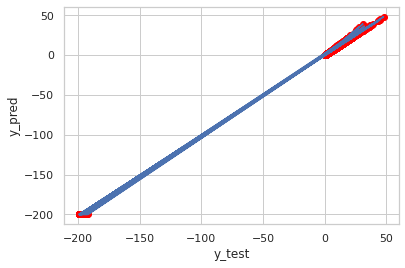

In [24]:
plt.plot(prediction, y_test)
plt.xlabel("y_test")
plt.ylabel("y_pred")   
plt.scatter(prediction,y_test, c='red')